# Exploratory Analysis of NN

In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file produced from the network. 

Note: This the file should contain two the training & validation scores for each of the models (i.e. regular and slow).

In [3]:
df = pd.read_csv("accuracy_metrics")

In [8]:
df

,Slow Training,Slow Validation,Slow Mean,Slow STE,Reg. Train,Reg. Validation,Reg. Mean,Reg. STE
1,0.966048,0.957767,0.597415,0.000519,0.969157,0.960194,0.713667,0.000519
2,0.967766,0.959223,0.615750,0.000465,0.971284,0.963107,0.741369,0.000465
3,0.969484,0.959709,0.626877,0.000385,0.973084,0.966019,0.758764,0.000385
4,0.970384,0.959709,0.634859,0.000475,0.974311,0.967961,0.765972,0.000475
5,0.971202,0.962621,0.642267,0.000508,0.975374,0.967961,0.773254,0.000508
...,...,...,...,...,...,...,...,...
2995,0.999673,0.990291,0.702204,0.000349,1.000000,0.991748,0.774619,0.000349
2996,0.999673,0.990291,0.702804,0.000420,1.000000,0.991748,0.773250,0.000420
2997,0.999673,0.990291,0.702380,0.000341,1.000000,0.991748,0.772402,0.000341
2998,0.999673,0.990291,0.701817,0.000322,1.000000,0.991748,0.774526,0.000322


Cleaning the dataframe for readability and graphability.

In [5]:
df = df.drop(['Unnamed: 0', '0', '5'], axis=1).drop([0])

In [11]:
df = df.rename({'1':"Slow Training",'2': "Slow Validation", '3': "Slow Mean", '4': "Slow STE",
                '6':"Reg. Train", '7':"Reg. Validation", '8': "Reg. Mean", '9': "Reg. STE"}, axis=1)

In [6]:
df

,Slow Training,Slow Validation,Slow K.A.,Reg. Train,Reg. Validation,Reg K.A.
1,49.472305,48.980583,0.561480,73.680763,73.495148,0.643050
2,58.692627,58.737865,0.591513,83.310150,82.864075,0.553444
3,65.941261,66.213593,0.537327,88.685265,88.446602,0.568717
4,75.145218,75.000000,0.577892,90.411522,90.533981,0.563944
5,84.381905,83.883492,0.618437,87.989853,87.718445,0.537678
...,...,...,...,...,...,...
2996,98.363739,97.524269,0.719042,98.838257,97.912621,0.785950
2997,98.371925,97.524269,0.705763,98.838257,97.912621,0.818273
2998,98.371925,97.524269,0.716337,98.854622,97.864075,0.826948
2999,98.380104,97.524269,0.720256,98.854622,97.912621,0.810532


Graphing the plot

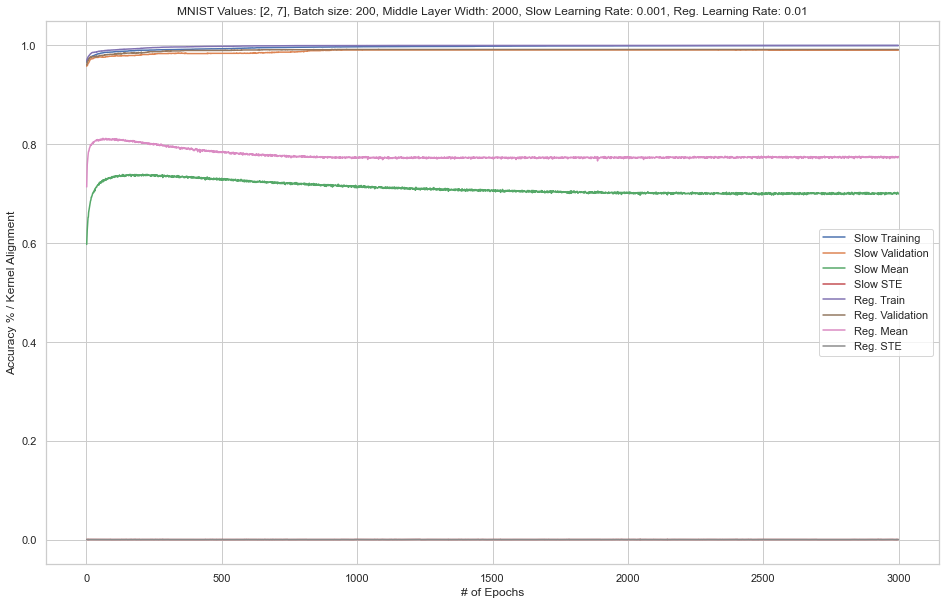

In [15]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df, dashes=False);
plot.set_title("MNIST Values: [2, 7], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Accuracy % / Kernel Alignment");

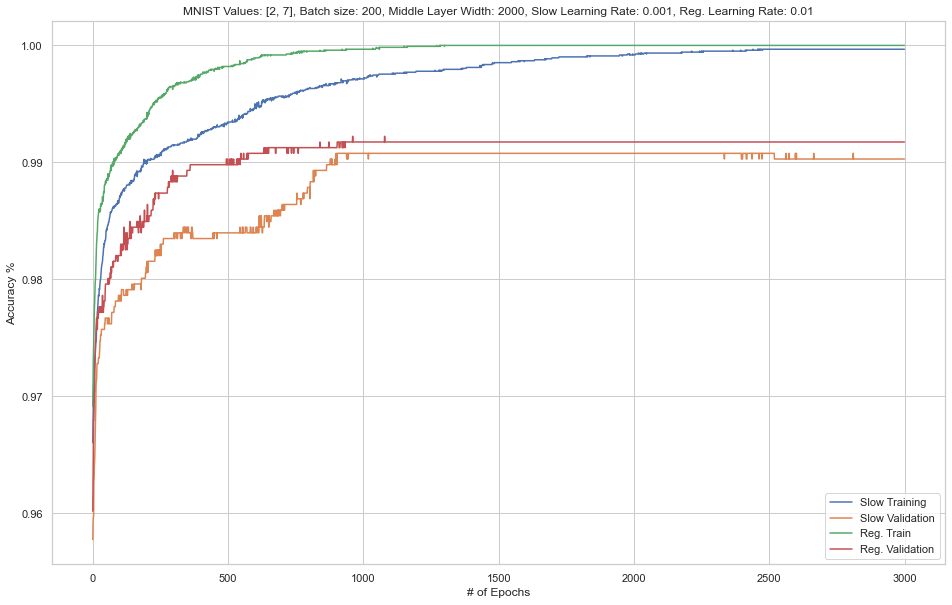

In [16]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df[["Slow Training", "Slow Validation", "Reg. Train", "Reg. Validation"]], dashes=False);
plot.set_title("MNIST Values: [2, 7], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Accuracy %");

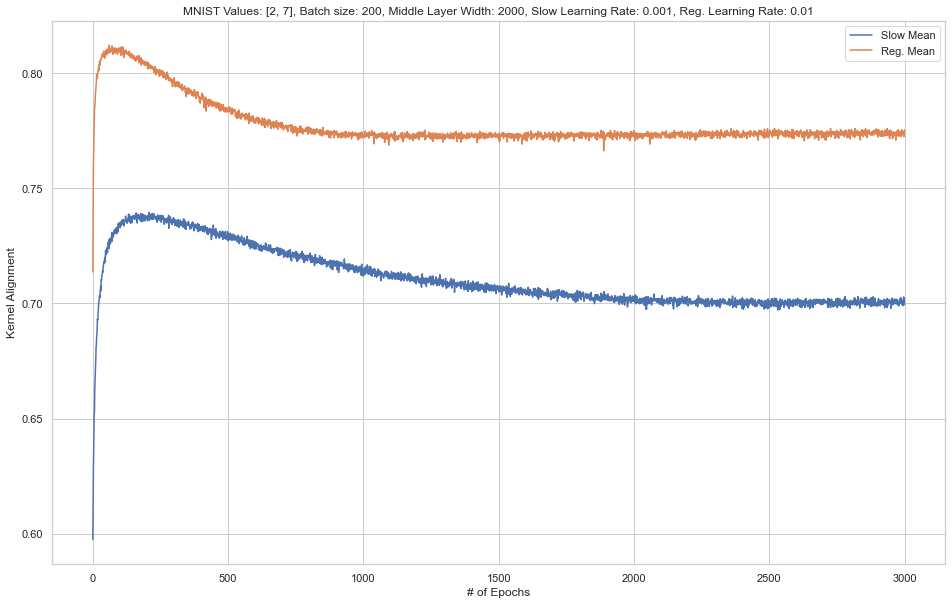

In [19]:
## sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df[["Slow Mean", "Reg. Mean"]], dashes=False);
plot.set_title("MNIST Values: [2, 7], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Kernel Alignment");